In [122]:
import librosa
import numpy as np
import os
import sys

In [123]:
from util.AudioClean import AudioClean

test_path = os.path.join(os.getcwd(), 'tests', 'WAVs (Raw Audio)', 'trumpetTest1(80)[MSBasic]{Pause}(C5).wav')
output_path = os.path.join(os.getcwd(), "trimmed_wav", "trimmedTrumpet.wav")
display(os.getcwd())
display(output_path)
AudioClean.clean_audio(test_path, output_path)

'c:\\Users\\xlr9c\\OneDrive\\Documents\\GitHub\\dootdoot'

'c:\\Users\\xlr9c\\OneDrive\\Documents\\GitHub\\dootdoot\\trimmed_wav\\trimmedTrumpet.wav'

485098
485097
485096
485095
485094
485093
485092
485091
485090
485089
485088
485087
485086
485085
485084
485083
485082
485081
485080
485079
485078
485077
485076
485075
485074
485073
485072
485071
485070
485069
485068
485067
485066
485065
485064
485063
485062
485061
485060
485059
485058
485057
485056
485055
485054
485053
485052
485051
485050
485049
485048
485047
485046
485045
485044
485043
485042
485041
485040
485039
485038
485037
485036
485035
485034
485033
485032
485031
485030
485029
485028
485027
485026
485025
485024
485023
485022
485021
485020
485019
485018
485017
485016
485015
485014
485013
485012
485011
485010
485009
485008
485007
485006
485005
485004
485003
485002
485001
485000
484999
484998
484997
484996
484995
484994
484993
484992
484991
484990
484989
484988
484987
484986
484985
484984
484983
484982
484981
484980
484979
484978
484977
484976
484975
484974
484973
484972
484971
484970
484969
484968
484967
484966
484965
484964
484963
484962
484961
484960
484959
484958
484957
484956

In [124]:
y, sr = librosa.load(output_path)

In [125]:
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)
display(tempo)

array([80.74951172])

array([], dtype=float32)

array([0.31732953, 0.3421219 , 0.32966816, ..., 0.11080743, 0.13645561,
       0.13610628], dtype=float32)

np.float32(2.3704022e-05)

np.int64(1941)

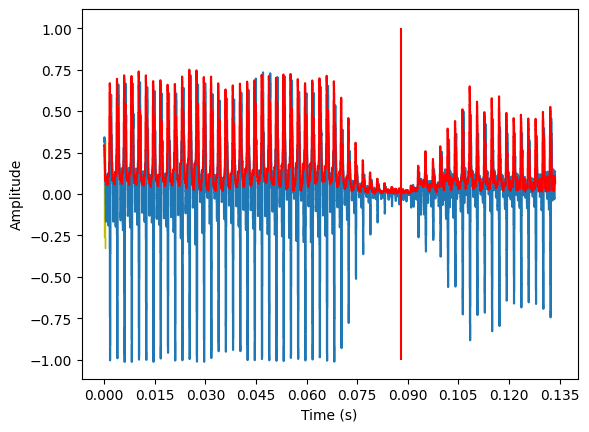

array([ 0.05653741,  0.02807113,  0.02924121, ..., -0.02607619,
       -0.06219798, -0.04477075], dtype=float32)

np.float32(4.6443194e-05)

np.int64(2079)

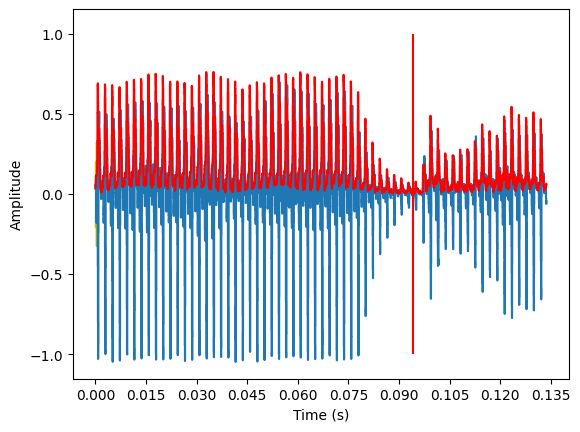

array([ 0.14712358,  0.03355312, -0.08559496, ...,  0.17535335,
        0.12635297,  0.0909117 ], dtype=float32)

np.float32(4.453957e-05)

np.int64(2254)

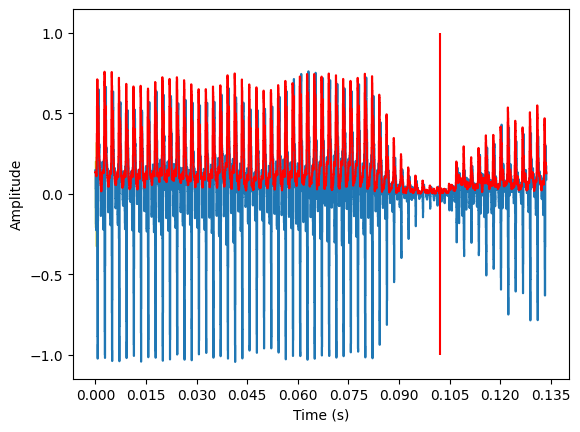

array([0.5816332 , 0.3773196 , 0.22926348, ..., 0.06520484, 0.08503101,
       0.09000035], dtype=float32)

np.float32(2.6654452e-05)

np.int64(2336)

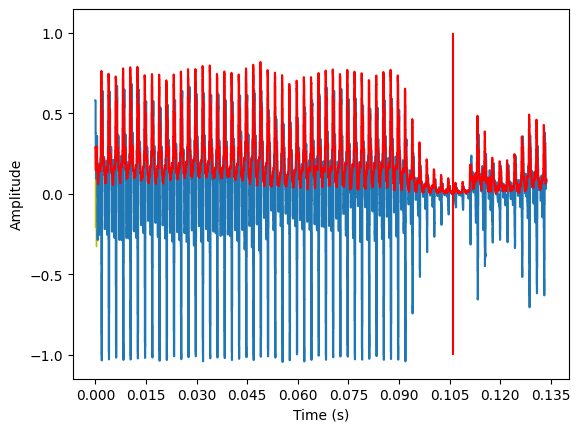

array([ 0.24823199,  0.21178195,  0.17512733, ..., -0.05767104,
       -0.01595862,  0.03687374], dtype=float32)

np.float32(2.3003668e-05)

np.int64(2556)

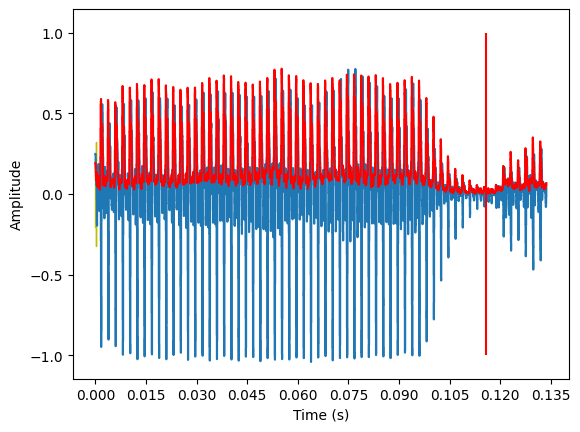

array([ 0.14470536,  0.10609058,  0.00948899, ..., -0.02292854,
       -0.04239266,  0.00715564], dtype=float32)

np.float32(2.5480986e-05)

np.int64(2725)

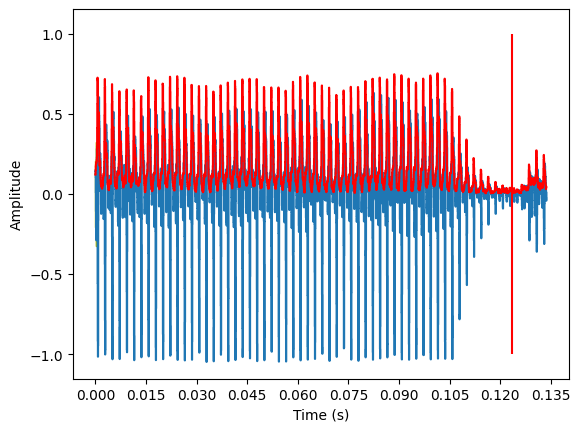

array([ 4.3546718e-01,  5.2552509e-01,  5.4976118e-01, ...,
        3.9607979e-02,  8.4131956e-05, -1.5824277e-02], dtype=float32)

np.float32(2.996996e-05)

np.int64(2863)

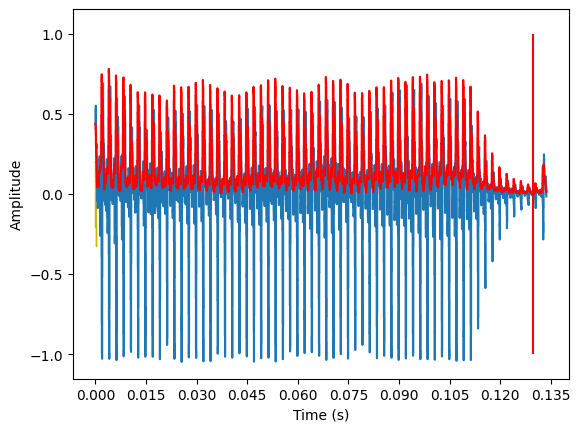

array([ 3.4282103e-01,  2.6845193e-01,  3.2363647e-01, ...,
       -1.7569683e-02, -3.1604618e-04,  1.6412422e-02], dtype=float32)

np.float32(1.3686717e-05)

np.int64(2932)

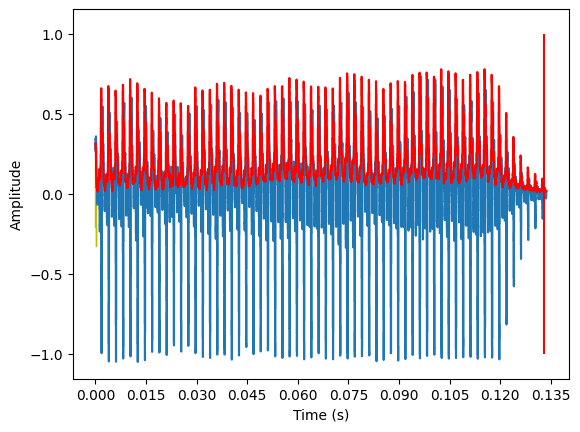

In [170]:
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline

y_diff = []
search_intervals = []

y_slices = []

beats = 9

# convolution
window_size = 5
window = np.ones(window_size) / window_size
y_smooth = np.convolve(abs(y), window, mode='valid')

for i in range(beats):
    samples_per_beat = (60 / tempo) * sr
    baseline = (60 / tempo) * i
    search_interval = (baseline * sr) + [-samples_per_beat * 0.09, samples_per_beat * 0.09]

    lower_bound = int(search_interval[0][0])
    upper_bound = int(search_interval[1][0])

    y_slice1 = y_smooth[lower_bound:upper_bound]
    y_slice = y[lower_bound:upper_bound]
    display(y_slice)

    if len(y_slice) > 0:
        display(min(abs(y_slice)))

        index = np.where(abs(y_slice1) == min(abs(y_slice1)))[0][0]
        display(index)

        plt.figure()
        librosa.display.waveshow(y_slice, sr=sr)
        librosa.display.waveshow(abs(y_slice1), sr=sr, color='r')
        librosa.display.waveshow(rms, sr=sr, color='y', max_points=100)
        plt.xlabel('Time (s)')
        plt.ylabel('Amplitude')
        plt.vlines(index / sr, -1, 1, color='r')
        plt.show()

    search_intervals.append(search_interval)
    # display(search_interval / sr)

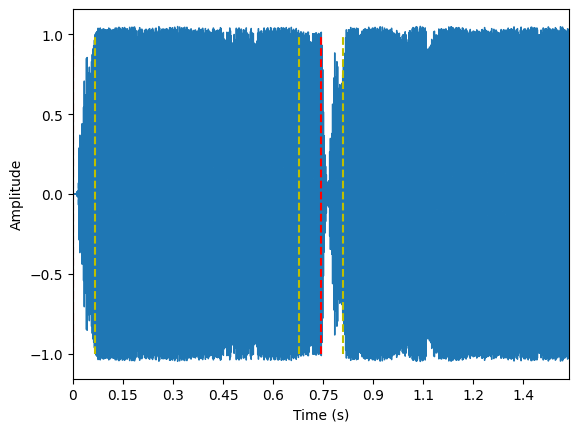

In [168]:
fig, ax = plt.subplots()
librosa.display.waveshow(y, sr=sr, ax=ax)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.xlim(0, beats * (60 / tempo))
plt.vlines([(60 / tempo) * i for i in range(beats)], -1, 1, color='r', linestyle='--')
plt.vlines([(search_intervals[i][j][0] / sr) for i in range(beats) for j in range(2)], -1, 1, color='y', linestyle='--')

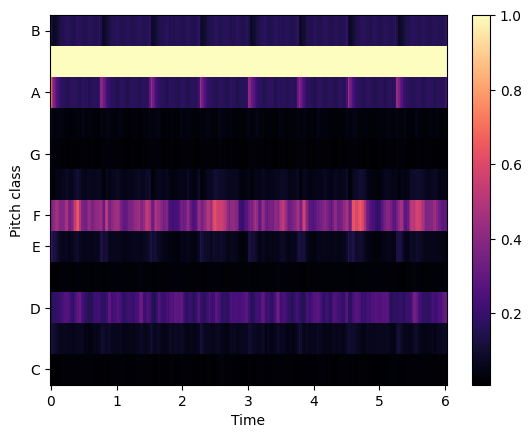

In [128]:
chroma = librosa.feature.chroma_stft(y=y, sr=sr)
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.colorbar()

In [140]:
display(chroma[0])

array([0.02012327, 0.01439844, 0.01504157, 0.01558821, 0.01418895,
       0.01238157, 0.01582484, 0.02023291, 0.02227606, 0.02540033,
       0.02175556, 0.01685985, 0.01428396, 0.01807228, 0.02166941,
       0.01927137, 0.01982379, 0.01549738, 0.01413416, 0.01820983,
       0.02147692, 0.02441672, 0.02416008, 0.02591728, 0.02071017,
       0.0174905 , 0.02019599, 0.02135259, 0.02318458, 0.01636191,
       0.01366173, 0.01428839, 0.01472431, 0.0171207 , 0.01377084,
       0.01390205, 0.01728693, 0.01412371, 0.01364376, 0.01932422,
       0.02081387, 0.02088866, 0.01997465, 0.02047573, 0.02096517,
       0.02407777, 0.0262902 , 0.01882099, 0.01775061, 0.01946858,
       0.01627308, 0.01371352, 0.01414817, 0.01721556, 0.01590868,
       0.01785767, 0.02199461, 0.02042391, 0.0192185 , 0.01954114,
       0.02318181, 0.02075163, 0.01988985, 0.01978023, 0.01601768,
       0.02056653, 0.01740223, 0.01400402, 0.01208249, 0.01181157,
       0.01531827, 0.01790802, 0.0163019 , 0.01625175, 0.01644